In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Make sure that you have the dependency installed on your system
# If not installed, install by running the following
!pip install kafka-python

     |████████████████████████████████| 246 kB 4.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn
from sklearn.preprocessing import MinMaxScaler
from numpy import nan
from numpy import inf
from sklearn.preprocessing import LabelEncoder

#Binary Classification

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS Assignment 2 Data/cicids_static_data.csv') 
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.000000,0.000000,133,133,133.00,0.000000,2.100629e+06,25157.232700,5.300000e+01,9.006664e+01,157,1,1,1.000,0.000000e+00,1,1,1,1.000000e+00,0.000000e+00,1,1,0,0,0,0,40,40,12578.616350,12578.616350,34,133,73.600000,54.224533,2940.30000,0,0,0,0,0,0,0,0,1,92.000000,34.000000,133.00,40,0,0,0,0,0,0,2,68,2,266,-1,-1,1,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
1,53,51673,2,2,90,166,45,45,45.000000,0.000000,83,83,83.00,0.000000,4.954231e+03,77.409866,1.722433e+04,2.982736e+04,51666,3,4,4.000,0.000000e+00,4,4,3,3.000000e+00,0.000000e+00,3,3,0,0,0,0,64,64,38.704933,38.704933,45,83,60.200000,20.813457,433.20000,0,0,0,0,0,0,0,0,1,75.250000,45.000000,83.00,64,0,0,0,0,0,0,2,90,2,166,-1,-1,1,32,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
2,7496,43,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.395349e+05,46511.627910,4.300000e+01,0.000000e+00,43,43,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,20,23255.813950,23255.813950,0,6,2.000000,3.464102,12.00000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.00,40,0,0,0,0,0,0,1,0,1,6,29200,0,0,40,0.00000,0.0000,0,0,0.000,0.000,0,0,ATTACK
3,46564,61,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,1.967213e+05,32786.885250,6.100000e+01,0.000000e+00,61,61,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,20,20,16393.442620,16393.442620,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.00,20,0,0,0,0,0,0,1,6,1,6,440,307,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
4,80,69,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,28985.507250,6.900000e+01,0.000000e+00,69,69,69,69.000,0.000000e+00,69,69,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,28985.507250,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.00,40,0,0,0,0,0,0,2,0,0,0,251,-1,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,50100,197,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,6.091371e+04,10152.284264,1.970000e+02,0.000000e+00,197,197,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,20,20,5076.142132,5076.142132,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.00,20,0,0,0,0,0,0,1,6,1,6,62,256,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,BENIGN
25187,3390,48,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.250000e+05,41666.666670,4.800000e+01,0.000000e+00,48,48,0,0.000,0.000000e+00,0,0,0,0.000000e+

In [ ]:
#Replacing inf values with nan to be removed
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#Encoding the labels
Labels = {"BENIGN": 0, "ATTACK": 1}
df["Label"] = df.Label.map(Labels)

#Dropping NANs
df = df.dropna()
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,159,2,2,68,266,34,34,34.000000,0.000000,133,133,133.00,0.000000,2.100629e+06,25157.232700,5.300000e+01,9.006664e+01,157,1,1,1.000,0.000000e+00,1,1,1,1.000000e+00,0.000000e+00,1,1,0,0,0,0,40,40,12578.616350,12578.616350,34,133,73.600000,54.224533,2940.30000,0,0,0,0,0,0,0,0,1,92.000000,34.000000,133.00,40,0,0,0,0,0,0,2,68,2,266,-1,-1,1,20,0.00000,0.0000,0,0,0.000,0.000,0,0,0
1,53,51673,2,2,90,166,45,45,45.000000,0.000000,83,83,83.00,0.000000,4.954231e+03,77.409866,1.722433e+04,2.982736e+04,51666,3,4,4.000,0.000000e+00,4,4,3,3.000000e+00,0.000000e+00,3,3,0,0,0,0,64,64,38.704933,38.704933,45,83,60.200000,20.813457,433.20000,0,0,0,0,0,0,0,0,1,75.250000,45.000000,83.00,64,0,0,0,0,0,0,2,90,2,166,-1,-1,1,32,0.00000,0.0000,0,0,0.000,0.000,0,0,0
2,7496,43,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.395349e+05,46511.627910,4.300000e+01,0.000000e+00,43,43,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,20,23255.813950,23255.813950,0,6,2.000000,3.464102,12.00000,0,0,0,1,0,0,0,0,1,3.000000,0.000000,6.00,40,0,0,0,0,0,0,1,0,1,6,29200,0,0,40,0.00000,0.0000,0,0,0.000,0.000,0,0,1
3,46564,61,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,1.967213e+05,32786.885250,6.100000e+01,0.000000e+00,61,61,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,20,20,16393.442620,16393.442620,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.00,20,0,0,0,0,0,0,1,6,1,6,440,307,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,0
4,80,69,2,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,28985.507250,6.900000e+01,0.000000e+00,69,69,69,69.000,0.000000e+00,69,69,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,28985.507250,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.00,40,0,0,0,0,0,0,2,0,0,0,251,-1,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25186,50100,197,1,1,6,6,6,6,6.000000,0.000000,6,6,6.00,0.000000,6.091371e+04,10152.284264,1.970000e+02,0.000000e+00,197,197,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,20,20,5076.142132,5076.142132,6,6,6.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.00,20,0,0,0,0,0,0,1,6,1,6,62,256,0,20,0.00000,0.0000,0,0,0.000,0.000,0,0,0
25187,3390,48,1,1,0,6,0,0,0.000000,0.000000,6,6,6.00,0.000000,1.250000e+05,41666.666670,4.800000e+01,0.000000e+00,48,48,0,0.000,0.000000e+00,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40

In [ ]:
# splitting features and labels
X = df.drop('Label',axis=1) 
y = df['Label']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=2)
rf_clf.fit(X, y)

RandomForestClassifier(n_estimators=2)

f1 score = 0.9892561983471074
Accuracy score = 0.9979347869256127
Precision score = 0.9987484355444305
recall score = 0.9799426934097422


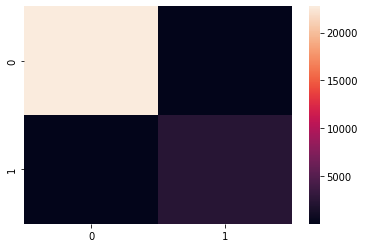

In [ ]:
preds = rf_clf.predict(X)
print("f1 score = " + str(f1_score(y, preds)))
print("Accuracy score = " + str(accuracy_score(y, preds)))
print("Precision score = " + str(precision_score(y, preds)))
print("recall score = " + str(recall_score(y, preds)))

sns.heatmap(confusion_matrix(y, preds))

In [ ]:
np.count_nonzero(y)

2443

- **Dynamic Model**

In [ ]:
import time

# Import the python Consumer Client for Kafka
from kafka import KafkaConsumer

# instantiate the KafkaConsumer Class using the arguments mentioned.
# do not change any arguments other than the first positional argument.
consumer = KafkaConsumer(
    'task1',   # change this to "task2" for the IOT Botnet Detection  ---- important ----
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

# Data Stream flowing in.
i = 0
kafka_data = []
for message in consumer:
    # print(f"Consuming the {i+1}th data packet!")
    
    data_packet = message.value
    # print(data_packet)
    
    
    ##############################################
    
    features = eval(data_packet)
    kafka_data.append(features)
    
    
    
    # your adaptation logic here #
    
    
    
    
    
    
    
    
    ##############################################
    
    if i == 101000:
        break
        
    i += 1

In [ ]:
# Converting streamed data to dataframe
kafka_data = pd.DataFrame(kafka_data)

#Replacing inf values with nan to be removed
kafka_data.replace([np.inf, -np.inf], np.nan, inplace=True)

#Encoding the labels
Labels = {"BENIGN": 0, "ATTACK": 1}
kafka_data["Label"] = kafka_data.Label.map(Labels)

#Dropping NANs
kafka_data = kafka_data.dropna()
kafka_data = kafka_data[0:100000]
kafka_data.columns = df.columns
kafka_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,30973,2,2,60,264,30,30,30.0,0.0,132,132,132.0,0.0,1.046072e+04,1.291447e+02,10324.333330,17838.116780,30922,3,48,48.0,0.0,48,48,3,3.0,0.0,3,3,0,0,0,0,64,64,6.457237e+01,64.572369,30,132,70.800000,55.867701,3121.200000,0,0,0,0,0,0,0,0,1,88.50,30.0,132.0,64,0,0,0,0,0,0,2,60,2,264,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1,52996,71,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,2.816901e+04,71.000000,0.000000,71,71,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,1.408451e+04,14084.507040,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,1935,1497,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,53,77249,2,2,82,204,41,41,41.0,0.0,102,102,102.0,0.0,3.702313e+03,5.178061e+01,25749.666670,44557.301900,77200,1,1,1.0,0.0,1,1,48,48.0,0.0,48,48,0,0,0,0,40,64,2.589030e+01,25.890303,41,102,65.400000,33.411076,1116.300000,0,0,0,0,0,0,0,0,1,81.75,41.0,102.0,40,0,0,0,0,0,0,2,82,2,204,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,53,223,2,2,68,306,34,34,34.0,0.0,153,153,153.0,0.0,1.677130e+06,1.793722e+04,74.333333,87.523330,172,3,48,48.0,0.0,48,48,3,3.0,0.0,3,3,0,0,0,0,64,64,8.968610e+03,8968.609865,34,153,81.600000,65.178984,4248.300000,0,0,0,0,0,0,0,0,1,102.00,34.0,153.0,64,0,0,0,0,0,0,2,68,2,306,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,53,152,2,2,46,46,23,23,23.0,0.0,23,23,23.0,0.0,6.052632e+05,2.631579e+04,50.666667,86.025190,150,1,1,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0,0,0,64,64,1.315789e+04,13157.894740,23,23,23.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1,28.75,23.0,23.0,64,0,0,0,0,0,0,2,46,2,46,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100080,18895,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.00,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,5141,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0
100081,443,58,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,3.448276e+04,58.000000,0.000000,58,58,58,58.0,0.0,58,58,0,0.0,0.0,0,0,0,0,0,0,64,0,3.448276e+04,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.00,0.0,0.0,64,0,0,0,0,0,0,2,0,0,0,348,-1,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0
100082,53,23784,2,2,66,214,33,33,33.0,0.0,107,107,107.0,0.0,1.177262e+04,1.681803e+02,7928.000000,13689.283730,23735,1,1,1.0,0.0,1,1,48,48.0,0.0,48,48,0,0,0,0,40,64,8.409014e+01,84.090145,33,107,62.600000,40.531469,1642.800000,0,0,0,0,0,0,0,0,1,78.25,33.0

In [ ]:
f1_scores =[]
Accuracies = []
precisions = []
recalls = []

f1_scores_dynamic =[]
Accuracies_dynamic = []
precisions_dynamic = []
recalls_dynamic = []

Dynamic_data = df
j = 0
rf_clf_dynamic = RandomForestClassifier(n_estimators=2)
#fitting the model with the original data as initial step
rf_clf_dynamic.fit(X, y)

for i in range(100):
  Dynamic_data = Dynamic_data.iloc[1000:]
  Dynamic_data = Dynamic_data.append(kafka_data[j:j+1000],ignore_index=True)
  

  # splitting features and labels
  X_dynamic = Dynamic_data.drop('Label',axis=1) 
  y_dynamic = Dynamic_data['Label']

  #evaluating then retraining the dynamic model
  preds_dynamic = rf_clf_dynamic.predict(X_dynamic)
  f1_scores_dynamic.append(f1_score(y_dynamic, preds_dynamic))
  Accuracies_dynamic.append(accuracy_score(y_dynamic, preds_dynamic))
  precisions_dynamic.append(precision_score(y_dynamic, preds_dynamic))
  recalls_dynamic.append(recall_score(y_dynamic, preds_dynamic))

  rf_clf_dynamic.fit(X_dynamic, y_dynamic)

  #evaluating the static model
  preds = rf_clf.predict(X_dynamic)
  f1_scores.append(f1_score(y_dynamic, preds))
  Accuracies.append(accuracy_score(y_dynamic, preds))
  precisions.append(precision_score(y_dynamic, preds))
  recalls.append(recall_score(y_dynamic, preds))

  j = j+1000

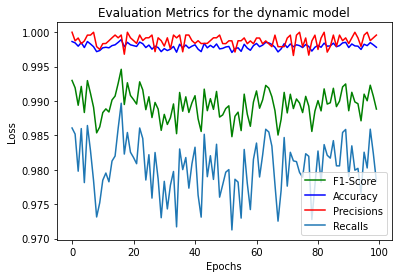

<Figure size 2880x2880 with 0 Axes>

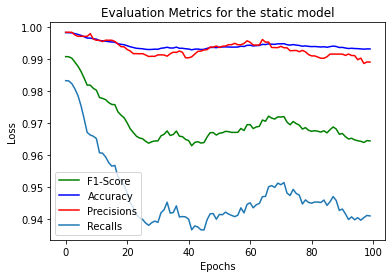

<Figure size 2880x2880 with 0 Axes>

In [ ]:
epochs = range(100)
plt.plot(epochs, f1_scores_dynamic, 'g', label='F1-Score')
plt.plot(epochs, Accuracies_dynamic, 'b', label='Accuracy')
plt.plot(epochs, precisions_dynamic, 'r', label='Precisions')
plt.plot(epochs, recalls_dynamic, '', label='Recalls')
plt.title('Evaluation Metrics for the dynamic model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, f1_scores, 'g', label='F1-Score')
plt.plot(epochs, Accuracies, 'b', label='Accuracy')
plt.plot(epochs, precisions, 'r', label='Precisions')
plt.plot(epochs, recalls, '', label='Recalls')
plt.title('Evaluation Metrics for the static model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

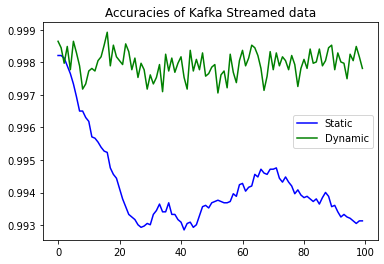

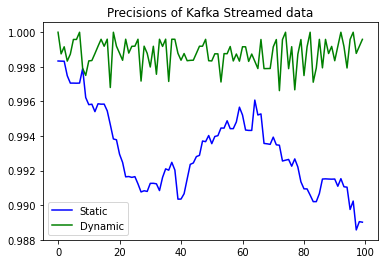

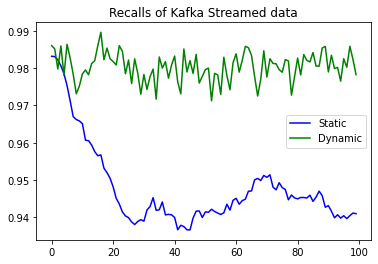

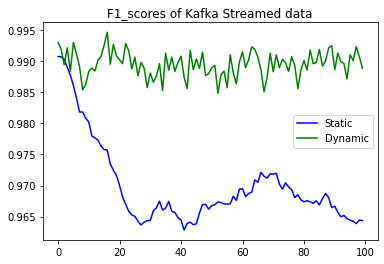

In [ ]:
plt.title("Accuracies of Kafka Streamed data")
plt.plot(epochs, Accuracies, 'b', label='Static')
plt.plot(epochs, Accuracies_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()

plt.title("Precisions of Kafka Streamed data")
plt.plot(epochs, precisions, 'b', label='Static')
plt.plot(epochs, precisions_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()

plt.title("Recalls of Kafka Streamed data")
plt.plot(epochs, recalls, 'b', label='Static')
plt.plot(epochs, recalls_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()

plt.title("F1_scores of Kafka Streamed data")
plt.plot(epochs, f1_scores, 'b', label='Static')
plt.plot(epochs, f1_scores_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()

#Multi Class Classification (IOT Botnet Detection)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CS Assignment 2 Data/iot_static_data.csv') 
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,3.695422e+04,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,3.695422e+04,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,18.885473,156.041505,2.027804e+02,349.823034,1.602610e+05,-2.956340e+04,-3.704318e-01,20.044037,154.488822,200.790831,...,30.034811,5.307252,1.298518e+02,4.880738,181.620841,227.548005,291.835506,59579.844560,1.744788e+04,0.446623,4.927844,181.698241,2.275817e+02,291.280119,5.957891e+04,1.779382e+04,4.556339e-01,4.975746,181.767997,227.609424,290.719232,5.957503e+04,1.814181e+04,0.464725,4.997565,181.796886,2.276200e+02,290.465036,5.957232e+04,1.829905e+04,4.688430e-01,4.999756,181.799689,2.276210e+02,290.439555,5.957202e+04,1.831480e+04,4.692557e-01,Provision PT 838 Security Camera,BENIGN
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,5.344982e+04,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,5.344982e+04,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.886530,169.313860,2.335350e+02,295.273638,9.040787e+04,-2.457803e+03,-3.919336e-02,62.898830,169.837418,233.073744,...,97.549007,1.686998,6.319929e+01,1.980432,69.960478,3.999805,101.835497,15.998438,0.000000e+00,0.000000,1.988213,69.976286,3.999930e+00,101.846358,1.599944e+01,0.000000e+00,0.000000e+00,1.996055,69.992095,3.999992,101.857221,1.599994e+01,0.000000e+00,0.000000,1.999605,69.999210,4.000000e+00,101.862109,1.600000e+01,0.000000e+00,0.000000e+00,1.999960,69.999921,4.000000e+00,101.862598,1.600000e+01,0.000000e+00,0.000000e+00,Provision PT 737E Security Camera,BENIGN
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,1.103949e+04,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,1.103949e+04,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996402,449.036043,1.999997e+01,449.036043,3.999987e+02,0.000000e+00,0.000000e+00,1.997840,449.021626,19.999988,...,14.978833,10.667405,2.061570e+02,1.996402,449.036043,19.999968,449.036043,399.998701,0.000000e+00,0.000000,1.997840,449.021626,1.999999e+01,449.021626,3.999995e+02,0.000000e+00,0.000000e+00,1.999279,449.007209,19.999999,449.007209,3.999999e+02,0.000000e+00,0.000000,2.428558,450.295009,2.008146e+01,450.295009,4.032651e+02,0.000000e+00,0.000000e+00,14.978833,455.354366,1.959295e+01,455.354366,3.838837e+02,0.000000e+00,0.000000e+00,Samsung SNH 1011 N Webcam,BENIGN


In [ ]:
#Replacing inf values with nan to be removed
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#Dropping NANs
df = df.dropna()

#Encoding 
df = df.apply(preprocessing.LabelEncoder().fit_transform)
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,14674,9184,13159,17335,12195,15913,19401,16553,20435,19958,15921,19736,12424,14072,14768,14674,9184,13159,17336,12195,15915,19404,16553,20438,19965,15921,19743,12425,14072,14771,9622,4753,7099,7062,9765,294,200,11172,5805,9260,...,14616,5989,10630,6521,2891,3666,3086,4091,7109,2648,6907,3071,4662,3436,4905,8418,3697,11667,4314,6369,5812,7860,13709,7103,19279,7587,10359,9404,11088,13693,10021,6588,10637,11897,10431,11457,13572,12289,5,0
1,15588,9817,14038,18259,12916,16949,20411,17355,21874,21489,17787,22371,19943,16853,21523,15588,9817,14038,18260,12916,16951,20414,17355,21877,21496,17787,22378,19944,16853,21526,10578,5061,7516,6098,9036,1385,1695,12089,6354,9698,...,20930,1022,8697,4511,266,1025,528,1385,4571,1629,4803,309,1998,546,2158,4867,2075,9075,1323,3190,1175,4402,7944,4295,9963,2688,4051,1782,1842,7894,6108,978,4172,3691,1825,474,6076,5461,4,0
2,8487,12503,10188,11262,15887,13042,11658,21319,19166,8130,20312,20696,6622,21494,19397,8487,12503,10188,11263,15888,13044,11661,21322,19169,8137,20312,20703,6623,21494,19400,6226,6174,5169,7695,7282,6357,4206,7457,7485,7163,...,11984,8309,13103,4864,3977,2296,4180,2749,4571,1629,5161,4215,3253,4524,3512,4867,2075,9522,5648,4905,6932,6349,7944,4295,13374,9680,7328,10922,8267,7894,6108,13494,12553,8210,12230,7868,6076,5461,6,0
3,67,696,4049,1865,2231,8581,3242,10635,18464,4035,19289,17623,3223,19008,15656,67,696,4049,1866,2231,8583,3245,10635,18467,4042,19289,17630,3224,19008,15659,0,0,0,70,0,6819,4206,0,0,0,...,10762,9390,11416,0,1,0,135,0,4571,1629,0,0,0,132,0,4867,2075,32,1,0,161,2,9384,4295,7032,0,0,200,4,7039,6108,11111,1,3,197,6,6471,5778,7,0
4,16286,10848,14039,18934,13981,17542,21273,18726,23339,22821,21816,24089,22926,22597,23890,16286,10848,14039,18935,13981,17544,21276,18726,23342,22828,21820,24096,22927,22598,23893,10098,7000,128,8743,321,6357,4206,12032,8427,844,...,22379,21633,21612,0,4407,0,4662,0,4571,1629,0,4643,0,5018,0,4867,2075,0,6080,0,7469,0,7944,4295,0,10162,0,11553,0,7894,6108,0,12980,0,12747,0,6076,5461,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25604,0,12325,0,0,15697,0,223,21600,4389,1650,22342,18667,4203,21862,18453,0,12325,0,0,15698,0,223,21603,4390,1652,22347,18674,4204,21862,18456,0,6048,0,7522,0,6357,4206,0,7357,0,...,11595,8671,13583,0,3853,0,4026,0,4571,1629,0,4088,0,4380,0,4867,2075,6,5523,473,6744,247,7944,4295,8279,9476,6776,10667,7639,7894,6108,13274,12334,8446,12011,8107,6076,5461,6,0
25605,14844,10301,15352,17507,13393,18364,19737,17797,23433,21819,18334,2

In [ ]:
# splitting features and labels
X = df.drop('Class',axis=1) 
y = df['Class']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=2)
rf_clf.fit(X, y)

RandomForestClassifier(n_estimators=2)

f1 score = 0.9992590737608429
Accuracy score = 0.9992580733335936
precision score = 0.99931486308258
recall score = 0.9992580733335936


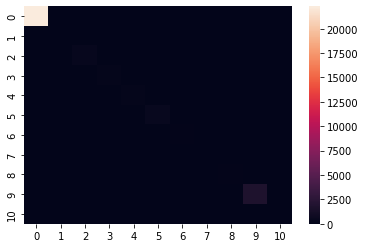

In [ ]:
preds = rf_clf.predict(X)
print("f1 score = " + str(f1_score(y, preds,average="weighted")))
print("Accuracy score = " + str(accuracy_score(y, preds)))
print("precision score = " + str(precision_score(y, preds,average="weighted")))
print("recall score = " + str(recall_score(y, preds,average="weighted")))

sns.heatmap(confusion_matrix(y, preds))

In [ ]:
np.count_nonzero(y)

3322

- **Dynamic Model**

In [ ]:
import time

# Import the python Consumer Client for Kafka
from kafka import KafkaConsumer

# instantiate the KafkaConsumer Class using the arguments mentioned.
# do not change any arguments other than the first positional argument.
consumer = KafkaConsumer(
    'task2',   # change this to "task2" for the IOT Botnet Detection  ---- important ----
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

# Data Stream flowing in.
i = 0
kafka_data = []
for message in consumer:
    # print(f"Consuming the {i+1}th data packet!")
    
    data_packet = message.value
    # print(data_packet)
    
    
    ##############################################
    
    features = eval(data_packet)
    kafka_data.append(features)
    
    
    
    # your adaptation logic here #
    
    
    
    
    
    
    
    
    ##############################################
    
    if i == 101000:
        break
        
    i += 1

In [ ]:
# Converting data to dataframe
kafka_data = pd.DataFrame(kafka_data)

#Replacing inf values with nan to be removed
kafka_data.replace([np.inf, -np.inf], np.nan, inplace=True)



#Dropping NANs
kafka_data = kafka_data.dropna()
#Encoding 
kafka_data = kafka_data.apply(preprocessing.LabelEncoder().fit_transform)

kafka_data = kafka_data[0:100000]
kafka_data.columns = df.columns
kafka_data

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,0,3,0,0,3,0,0,2,0,0,0,0,0,1,0,0,3,0,0,3,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,22267,14879,0,0,0,...,0,91611,0,0,1,0,1,0,15012,5304,0,0,0,0,0,16195,6667,0,1,0,1,0,25084,13402,0,1,0,1,0,25240,20418,0,1,0,1,0,19539,18369,0,5
1,38914,29420,21,48216,40629,0,51693,55847,1985,23981,56073,3586,21259,50225,8580,38915,29420,21,48219,40629,0,51698,55847,1985,23998,56073,3595,21266,50225,8587,0,13200,0,16372,0,22267,14879,0,16672,0,...,6671,71885,74692,0,7854,0,6717,0,15012,5304,0,6943,0,8009,0,16195,6667,0,10825,0,15985,0,25084,13402,13008,23792,13,31159,34,31421,22209,15055,35267,918,34576,448,23100,20832,0,0
2,44704,34436,40342,58685,47010,50998,68810,62217,69552,72375,62784,56984,38528,67719,52609,44705,34436,40343,58689,47010,51002,68816,62217,69556,72393,62784,57006,38535,67720,52620,29063,15875,22839,26389,29856,41348,24019,37001,20471,30320,...,53639,80982,80882,21252,9276,11673,14225,14308,23117,7603,24194,9593,15286,16103,16704,27595,11022,44072,13856,20662,26575,28296,43480,21212,76254,26022,35158,42825,40945,42933,29394,69437,39819,42330,46909,42408,251,199,8,0
3,50357,21273,35804,60456,31931,46119,68828,42534,60874,74739,57145,68793,78272,59729,76033,50358,21273,35804,60460,31931,46122,68834,42534,60878,74757,57145,68816,78279,59730,76046,32062,8527,19766,31165,35956,41913,25190,38362,12529,27310,...,80027,2380,30753,0,2892,0,10,0,15012,5304,0,2981,0,10,0,16195,6667,0,6571,0,53,0,25084,13402,0,12358,0,116,0,25240,20418,0,19353,0,34,0,19539,18369,5,0
4,6380,6897,113,16755,14583,3310,24811,19173,19862,55600,8570,19424,58205,3936,18336,6380,6897,113,16758,14583,3310,24816,19173,19862,55618,8570,19446,58212,3936,18343,5099,699,0,7982,20741,30820,14879,11888,2460,0,...,65175,14485,9900,0,26,0,531,12,19302,5304,0,73,4,533,1038,22600,7762,1284,471,5459,2242,12708,40672,18744,35425,13885,27951,12527,31287,40443,28194,55395,25315,32956,28818,31773,39664,34332,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19204,25961,35052,30553,41423,49253,60061,59901,70223,68770,61084,59350,40952,66406,56995,19204,25961,35052,30556,41423,49256,60066,59901,70227,68788,61084,59372,40959,66407,57007,13269,10977,15955,8965,20371,6671,6787,20101,14338,23694,...,54092,23596,72357,4655,6812,0,6559,19,4406,5304,6765,6517,0,7760,20,6302,6667,32807,10571,0,15832,12,37481,13402,75260,23056,13,30604,32,18687,18140,48527,34684,7,34208,20,17807,17194,7,0
99996,20249,22159,27709,29300,32523,36648,27963,42815,45453,7061,41104,8508,35855,53835,62735,20249,22159,27709,29303,32523,36651,279

In [ ]:
f1_scores =[]
Accuracies = []
precisions = []
recalls = []

f1_scores_dynamic =[]
Accuracies_dynamic = []
precisions_dynamic = []
recalls_dynamic = []

Dynamic_data = df
j = 0
rf_clf_dynamic = RandomForestClassifier(n_estimators=2)
#fitting the model with the original data as initial step
rf_clf_dynamic.fit(X, y)

for i in range(100):
  Dynamic_data = Dynamic_data.iloc[1000:]
  Dynamic_data = Dynamic_data.append(kafka_data[j:j+1000],ignore_index=True)
  

  # splitting features and labels
  X_dynamic = Dynamic_data.drop('Class',axis=1) 
  y_dynamic = Dynamic_data['Class']


  #evaluating then retraining the dynamic model
  preds_dynamic = rf_clf_dynamic.predict(X_dynamic)
  f1_scores_dynamic.append(f1_score(y_dynamic, preds_dynamic,average="weighted"))
  Accuracies_dynamic.append(accuracy_score(y_dynamic, preds_dynamic))
  precisions_dynamic.append(precision_score(y_dynamic, preds_dynamic,average="weighted"))
  recalls_dynamic.append(recall_score(y_dynamic, preds_dynamic,average="weighted"))

  rf_clf_dynamic.fit(X_dynamic, y_dynamic)

  #evaluating the static model
  preds = rf_clf.predict(X_dynamic)
  f1_scores.append(f1_score(y_dynamic, preds,average="weighted"))
  Accuracies.append(accuracy_score(y_dynamic, preds))
  precisions.append(precision_score(y_dynamic, preds,average="weighted"))
  recalls.append(recall_score(y_dynamic, preds,average="weighted"))

  j = j+1000

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pr

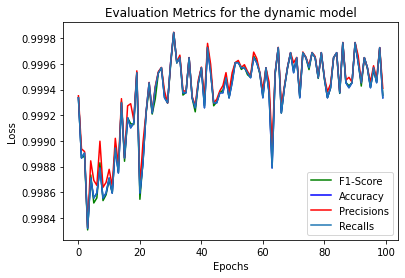

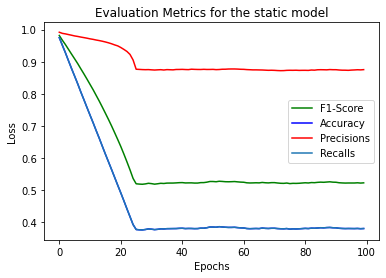

In [ ]:
epochs = range(100)
plt.plot(epochs, f1_scores_dynamic, 'g', label='F1-Score')
plt.plot(epochs, Accuracies_dynamic, 'b', label='Accuracy')
plt.plot(epochs, precisions_dynamic, 'r', label='Precisions')
plt.plot(epochs, recalls_dynamic, '', label='Recalls')
plt.title('Evaluation Metrics for the dynamic model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, f1_scores, 'g', label='F1-Score')
plt.plot(epochs, Accuracies, 'b', label='Accuracy')
plt.plot(epochs, precisions, 'r', label='Precisions')
plt.plot(epochs, recalls, '', label='Recalls')
plt.title('Evaluation Metrics for the static model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

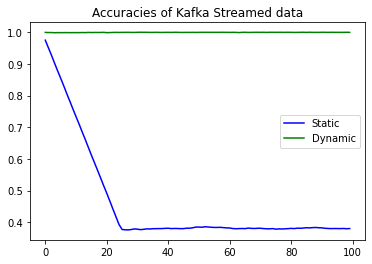

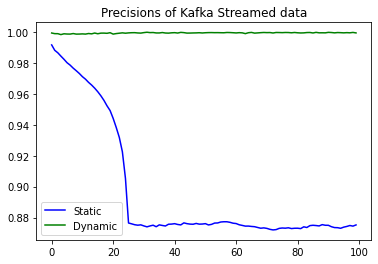

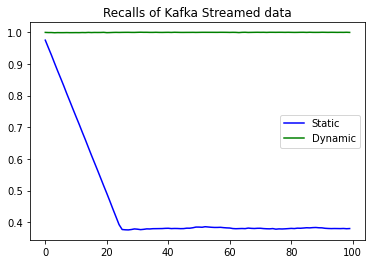

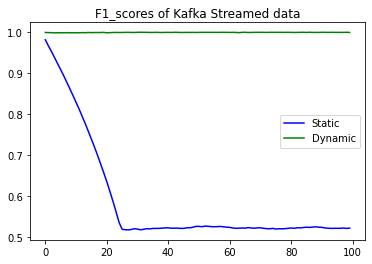

In [ ]:
plt.title("Accuracies of Kafka Streamed data")
plt.plot(epochs, Accuracies, 'b', label='Static')
plt.plot(epochs, Accuracies_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()

plt.title("Precisions of Kafka Streamed data")
plt.plot(epochs, precisions, 'b', label='Static')
plt.plot(epochs, precisions_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()

plt.title("Recalls of Kafka Streamed data")
plt.plot(epochs, recalls, 'b', label='Static')
plt.plot(epochs, recalls_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()

plt.title("F1_scores of Kafka Streamed data")
plt.plot(epochs, f1_scores, 'b', label='Static')
plt.plot(epochs, f1_scores_dynamic, 'g', label='Dynamic')
plt.legend()
plt.show()